# EDA & Feature Engineering

## Imports

In [106]:
import warnings
import pandas as pd
import numpy as np
import seaborn as sns
from pandas import DataFrame, Series

sns.set(rc={"figure.figsize": (10, 6), "axes.titlesize": 20, "axes.titleweight": "bold", "axes.labelsize": 15})
sns.set_palette("Set2")

warnings.filterwarnings('ignore')

## Data Overview

In [107]:
CATEGORY = "category"
STATE = "state"
PRICE = "price"
LIVING_SPACE = "living_space"
ROOMS = "rooms"
RATING_LOCATION = "rating_location"
RATING_PUBLIC_TRANSPORT = "rating_public_transport"
HOUSE_CATEGORY = "house_category"
HOUSE_YEAR = "house_build_year"
HOUSING_SITUATION = "housing_situation"
IS_BALCONY = "is_balcony"
IS_BATH = "is_bath"
PARKING = "parking_space"
IS_ELEVATOR = "is_elevator"
IS_GUEST_WC = "is_guest_wc"
IS_GARDEN = "is_garden"
IS_TERRACE = "is_terrace"
IS_WINTER_GARDEN = "is_wintergarden"
IS_BATH_WITH_WINDOW = "is_bath_with_window"
IS_NEED_RENOVATION = "is_need_renovation"
IS_NEW_BUILDING = "is_new_building"
ENERGY_HEATING_TYPE = "energy_heating_type"
ENERGY_SOURCE = "energy_source"
ENERGY_CERTIFICATE_TYPE = "energy_certificate_type"
ENERGY_BUILDING_TYPE = "energy_building_type"
ENERGY_ESSENTIAL_TYPE = "energy_essential_type"
ENERGY_EFFICIENT_CLASS = "energy_efficient_class"

In [108]:
df = pd.read_csv("./data/cleaned_property_data.csv", sep="|").drop_duplicates()
df.head()

,category,state,price,living_space,rooms,publisher,rating_location,rating_public_transport,house_category,housing_situation,...,is_garden,is_terrace,is_wintergarden,is_bath_with_window,is_need_renovation,is_new_building,parking_space,energy_source,energy_certificate_type,energy_efficient_class
0,Apartment,bl-baden-wuerttemberg,309000.0,85.50,3.5,Public publisher,Gut,Okay,Not given,Other,...,False,False,False,False,False,False,Keine Parkmöglichkeit,gas,verbrauchsausweis,h
1,Apartment,bl-baden-wuerttemberg,446500.0,77.00,2.5,Public publisher,Gut,Super,Not given,Other,...,False,False,False,True,True,False,Keine Parkmöglichkeit,gas,verbrauchsausweis,NaN
2,Apartment,bl-baden-wuerttemberg,472000.0,55.99,2.0,Public publisher,Gut,Gut,terrassenwohnung,Other,...,False,True,False,False,False,True,tiefgarage,gas,NaN,NaN
3,Apartment,bl-baden-wuerttemberg,179150.0,57.85,2.0,Public publisher,Gut,Gut,Not given,Other,...,False,False,False,False,False,False,Keine Parkmöglichkeit,öl,verbrauchsausweis,NaN
4,Apartment,bl-baden-wuerttemberg,325350.0,78.17,3.0,Public publisher,Okay,Okay,Not given,first_floor,...,False,True,False,True,False,True,Keine Parkmöglichkeit,elektro,NaN,NaN


In [109]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20731 entries, 0 to 20730
Data columns (total 25 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   category                 19972 non-null  object 
 1   state                    19972 non-null  object 
 2   price                    19972 non-null  float64
 3   living_space             19972 non-null  float64
 4   rooms                    19972 non-null  float64
 5   publisher                19972 non-null  object 
 6   rating_location          19972 non-null  object 
 7   rating_public_transport  19972 non-null  object 
 8   house_category           20731 non-null  object 
 9   housing_situation        20731 non-null  object 
 10  house_build_year         9044 non-null   float64
 11  is_balcony               19972 non-null  object 
 12  is_bath                  19972 non-null  object 
 13  is_elevator              19972 non-null  object 
 14  is_guest_wc           

In [110]:
df.describe()

,price,living_space,rooms,house_build_year
count,1.997200e+04,19972.000000,19972.000000,9044.000000
mean,5.299324e+05,130.073480,4.580538,1961.921274
std,7.067233e+05,94.821694,3.630682,55.100447
min,-3.100000e+03,15.750000,1.000000,1579.000000
25%,2.010000e+05,71.500000,3.000000,1935.000000
50%,3.646500e+05,110.000000,4.000000,1972.000000
75%,5.932500e+05,151.500000,5.000000,2000.000000
max,7.815750e+06,852.500000,48.000000,2024.000000


In [111]:
df.describe(include=["O"]).T

,count,unique,top,freq
category,19972,2,Apartment,10441
state,19972,16,bl-berlin,1399
publisher,19972,2,Public publisher,18903
rating_location,19972,5,Gut,9565
rating_public_transport,19972,5,Gut,5363
house_category,20731,15,Not given,9649
housing_situation,20731,3,Other,17314
is_balcony,19972,2,False,12960
is_bath,19972,2,False,11930
is_elevator,19972,2,False,16425


In [112]:
to_float_cols = [
    IS_BALCONY,
    IS_BATH,
    IS_ELEVATOR,
    IS_GUEST_WC,
    IS_GARDEN,
    IS_TERRACE,
    IS_WINTER_GARDEN,
    IS_BATH_WITH_WINDOW,
    IS_NEED_RENOVATION,
    IS_NEW_BUILDING,
]

for col in to_float_cols:
    df[col] = df[col].astype(bool)

df.describe(include=["O"]).T

,count,unique,top,freq
category,19972,2,Apartment,10441
state,19972,16,bl-berlin,1399
publisher,19972,2,Public publisher,18903
rating_location,19972,5,Gut,9565
rating_public_transport,19972,5,Gut,5363
house_category,20731,15,Not given,9649
housing_situation,20731,3,Other,17314
parking_space,20731,8,Keine Parkmöglichkeit,17185
energy_source,20731,4,gas,10227
energy_certificate_type,14849,2,verbrauchsausweis,7892


In [113]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20731 entries, 0 to 20730
Data columns (total 25 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   category                 19972 non-null  object 
 1   state                    19972 non-null  object 
 2   price                    19972 non-null  float64
 3   living_space             19972 non-null  float64
 4   rooms                    19972 non-null  float64
 5   publisher                19972 non-null  object 
 6   rating_location          19972 non-null  object 
 7   rating_public_transport  19972 non-null  object 
 8   house_category           20731 non-null  object 
 9   housing_situation        20731 non-null  object 
 10  house_build_year         9044 non-null   float64
 11  is_balcony               20731 non-null  bool   
 12  is_bath                  20731 non-null  bool   
 13  is_elevator              20731 non-null  bool   
 14  is_guest_wc           

## Helper Functions

In [136]:
MEAN = "mean"
MEDIAN = "median"

def plot_target_relation(x: str, title: str, aggfunc: str = "mean", rotate: float = 0.0):
    ax = sns.pointplot(x=x, y=PRICE, data=df, estimator=aggfunc)
    ax.set(title=title);
    ax.tick_params(axis='x', rotation=rotate)
    return df.pivot_table(index=x, values=PRICE, aggfunc=aggfunc)

def describe_histplot(x: str, title: str):
    sns.histplot(x=x, data=df).set(title=title)
    print(f"Skew:\t{df[x].skew()}")
    print(f"median:\t{df[x].median()}")
    return df[x].describe()

def countplot_rotate(x: str, rotate: float = 0):
    ax = sns.countplot(x=x, data=df)
    ax.set_xticklabels(ax.get_xticklabels(), rotation = rotate);

## Target

Skew:	5.6650100341391205
median:	364650.0


count    1.997200e+04
mean     5.299324e+05
std      7.067233e+05
min     -3.100000e+03
25%      2.010000e+05
50%      3.646500e+05
75%      5.932500e+05
max      7.815750e+06
Name: price, dtype: float64

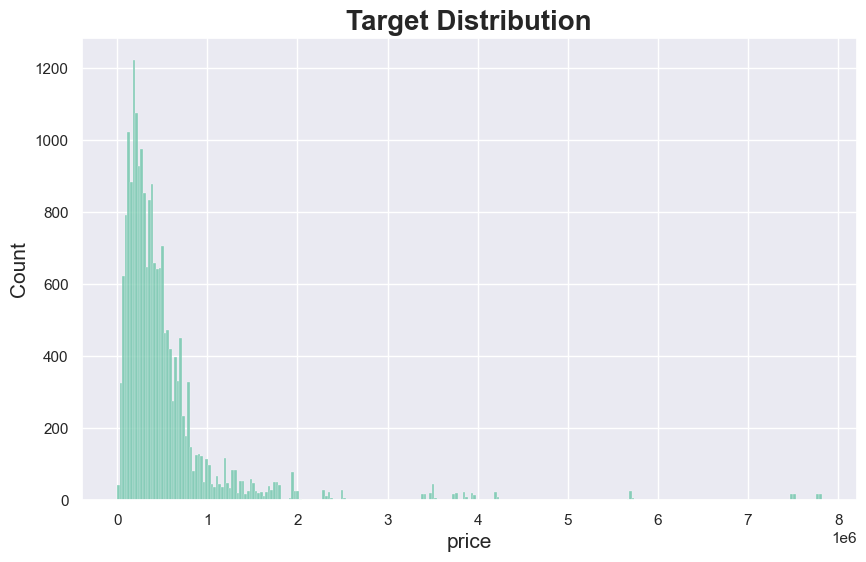

In [115]:
describe_histplot(x=PRICE, title="Target Distribution")

## Category

<AxesSubplot: xlabel='category', ylabel='count'>

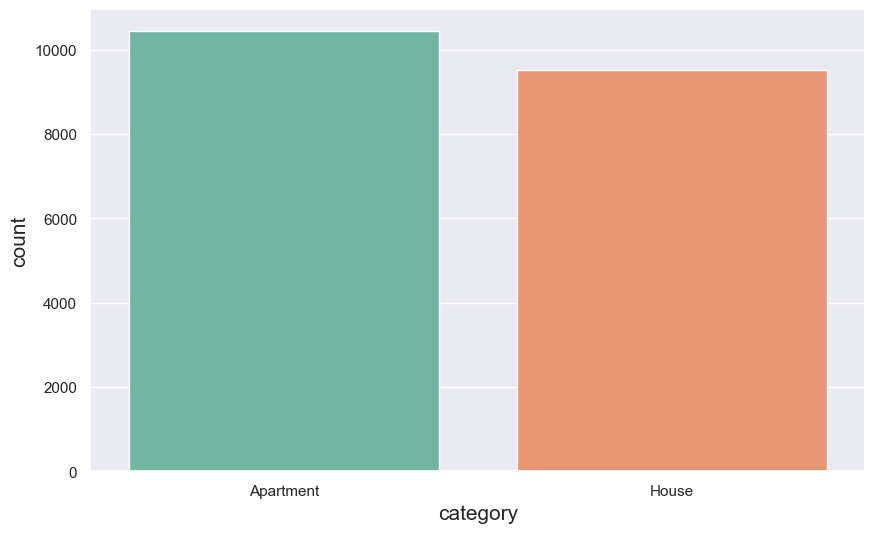

In [116]:
sns.countplot(x=CATEGORY, data=df)

,price
category,
Apartment,375189.52495
House,699449.81408


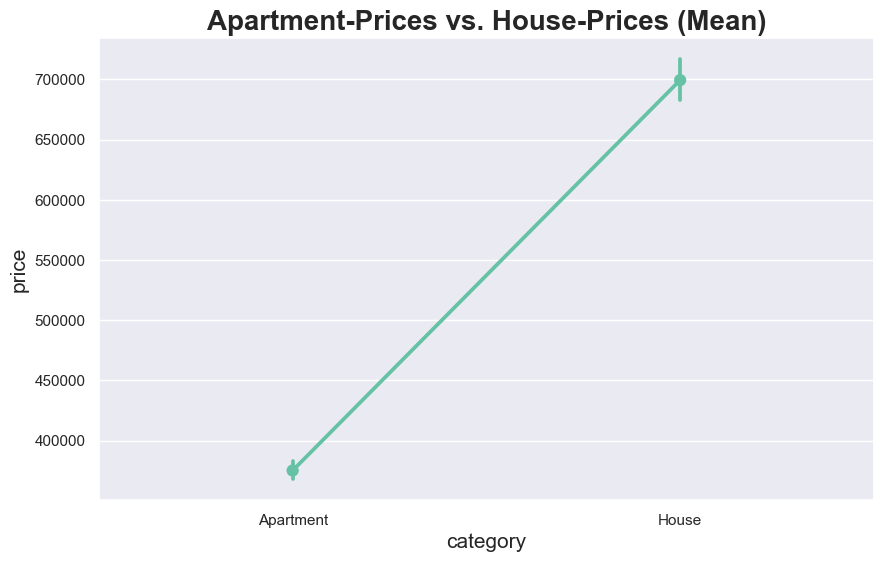

In [117]:
plot_target_relation(x=CATEGORY, title="Apartment-Prices vs. House-Prices (Mean)", aggfunc="mean")

,price
category,
Apartment,264500.0
House,470750.0


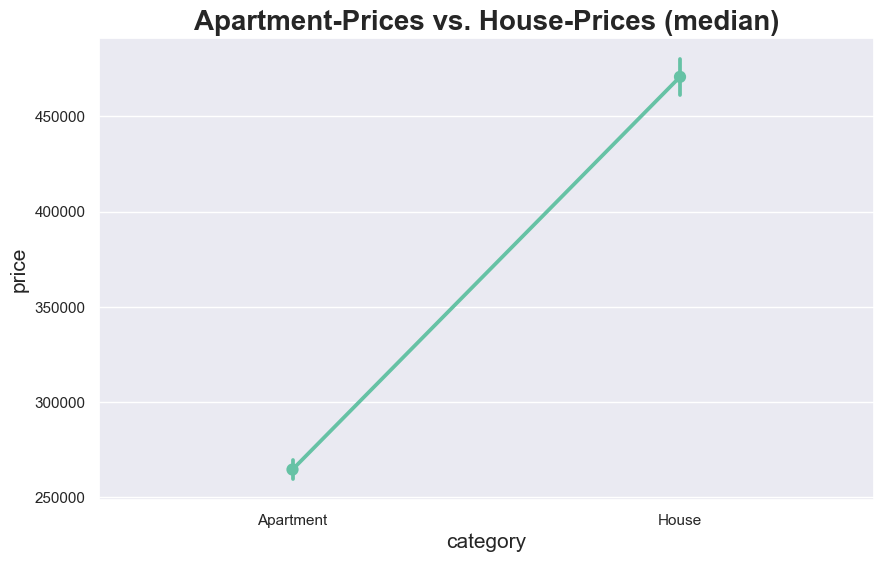

In [118]:
plot_target_relation(x=CATEGORY, title="Apartment-Prices vs. House-Prices (median)", aggfunc="median")

- => Category has a strong impact on the target

## State

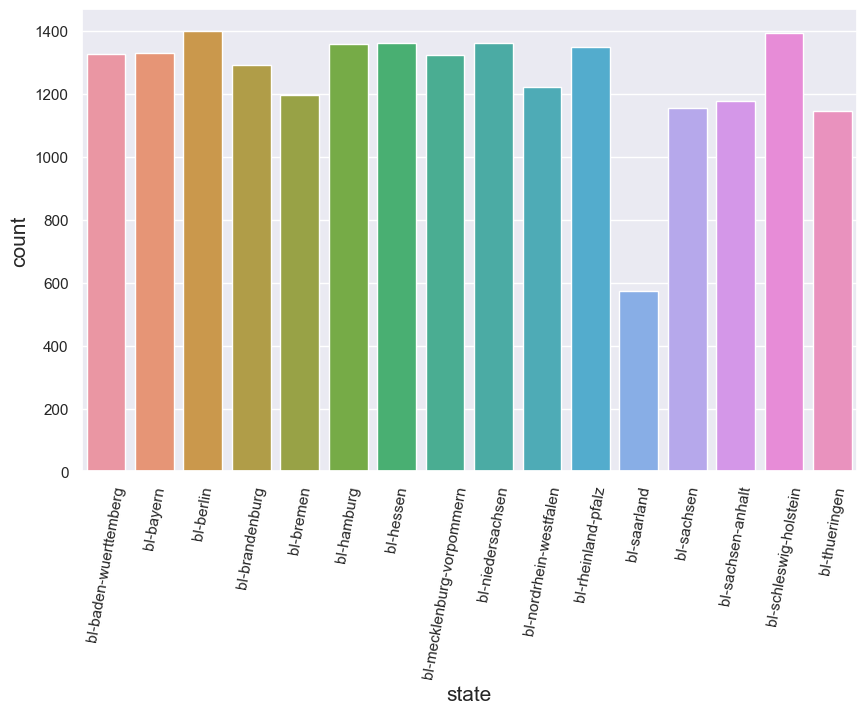

In [137]:
countplot_rotate(x=STATE, rotate=80)

,price
state,
bl-baden-wuerttemberg,5.260922e+05
bl-bayern,6.531890e+05
bl-berlin,1.213343e+06
bl-brandenburg,4.463617e+05
bl-bremen,4.343586e+05
bl-hamburg,1.201148e+06
bl-hessen,5.963509e+05
bl-mecklenburg-vorpommern,4.179994e+05
bl-niedersachsen,3.557538e+05


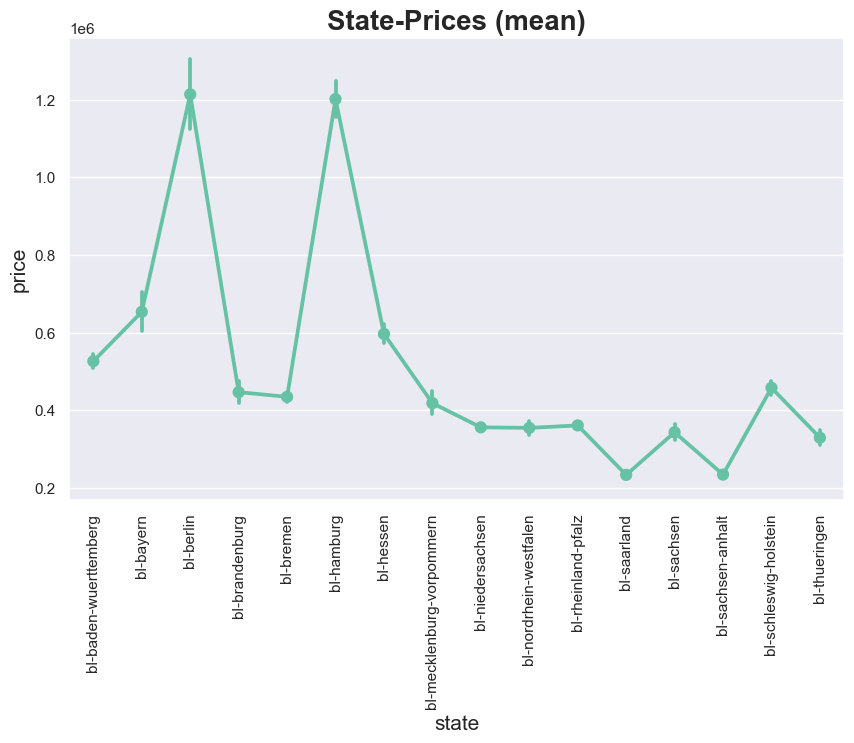

In [120]:
plot_target_relation(STATE, "State-Prices (mean)", "mean", rotate=90)

- => the state has a strong impact on the target.
- => OneHotEncoding

## Living Space

In [121]:
df[LIVING_SPACE].isna().sum()

759

Skew:	2.999225453260165
median:	110.0


count    19972.000000
mean       130.073480
std         94.821694
min         15.750000
25%         71.500000
50%        110.000000
75%        151.500000
max        852.500000
Name: living_space, dtype: float64

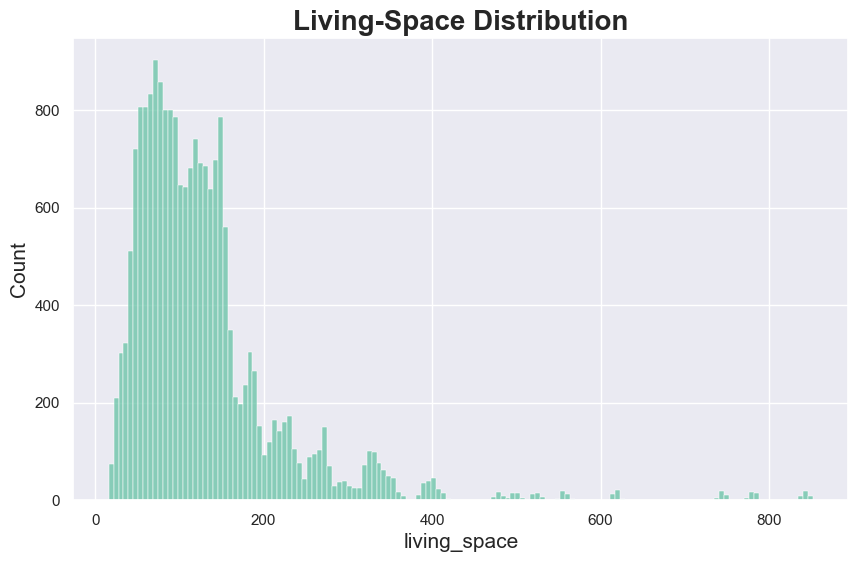

In [123]:
describe_histplot(x=LIVING_SPACE, title="Living-Space Distribution")

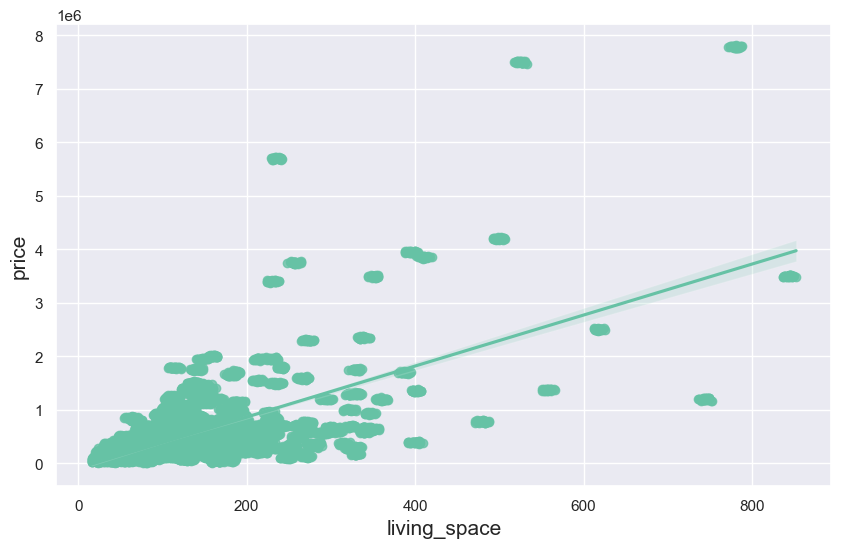

In [124]:
sns.regplot(x=LIVING_SPACE, y=PRICE, data=df);

- => Living-Space has a strong impact on the price
- => Skew -> Log-transformation
- => Scale

## Rooms

In [132]:
df[ROOMS].isna().sum()

759

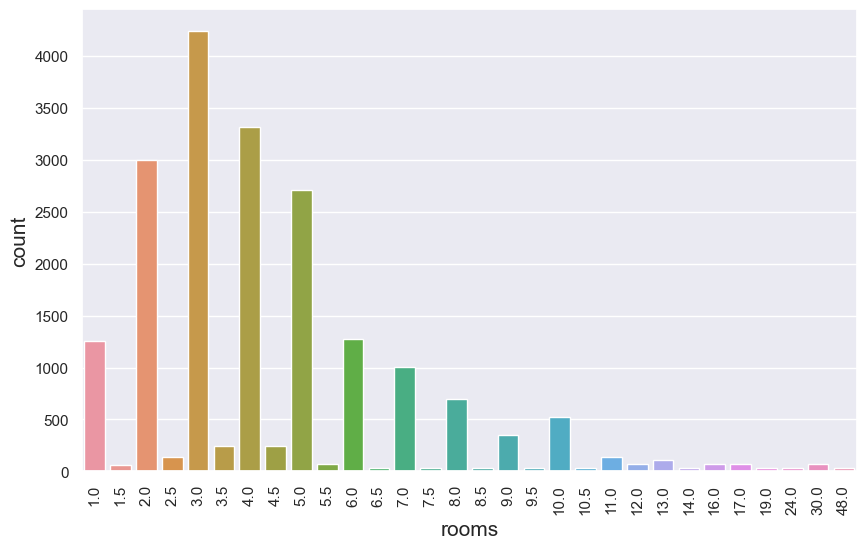

In [138]:
countplot_rotate(x=ROOMS, rotate=90)

In [129]:
df.head()

,category,state,price,living_space,rooms,publisher,rating_location,rating_public_transport,house_category,housing_situation,...,is_garden,is_terrace,is_wintergarden,is_bath_with_window,is_need_renovation,is_new_building,parking_space,energy_source,energy_certificate_type,energy_efficient_class
0,Apartment,bl-baden-wuerttemberg,309000.0,85.50,3.5,Public publisher,Gut,Okay,Not given,Other,...,False,False,False,False,False,False,Keine Parkmöglichkeit,gas,verbrauchsausweis,h
1,Apartment,bl-baden-wuerttemberg,446500.0,77.00,2.5,Public publisher,Gut,Super,Not given,Other,...,False,False,False,True,True,False,Keine Parkmöglichkeit,gas,verbrauchsausweis,NaN
2,Apartment,bl-baden-wuerttemberg,472000.0,55.99,2.0,Public publisher,Gut,Gut,terrassenwohnung,Other,...,False,True,False,False,False,True,tiefgarage,gas,NaN,NaN
3,Apartment,bl-baden-wuerttemberg,179150.0,57.85,2.0,Public publisher,Gut,Gut,Not given,Other,...,False,False,False,False,False,False,Keine Parkmöglichkeit,öl,verbrauchsausweis,NaN
4,Apartment,bl-baden-wuerttemberg,325350.0,78.17,3.0,Public publisher,Okay,Okay,Not given,first_floor,...,False,True,False,True,False,True,Keine Parkmöglichkeit,elektro,NaN,NaN


In [127]:
# TODOS

# --AFTER EDA
# PUBLISHER => interpolate NAN, wenn signifikant für TARGET
# RATING_LOCATION => interpolate NAN, wenn signifikant für TARGET
# RATING_PUBLIC_TRANSPORT => interpolate NAN, wenn signifikant für TARGET
# HOUSE_YEAR => NAN to 0 and convert to int, wenn signifikant für TARGET
# ENERGY_CERTIFICATE_TYPE => interpolate NAN, wenn signifikant für TARGET
# ENERGY_EFFICIENT_CLASS => interpolate NAN, wenn signifikant für TARGET

# interpolate Livingspace! -> own model?
